In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img_path = 'data/test/image529.png'
label_path = 'data/test/image529.txt'

In [3]:
def draw_bbox(img_path, label_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    file = open(label_path, 'r')
    lines = file.read().split('\n')[0:-1]
    file.close()
    boxes = []
    for line in lines:
        center_b = line.split(' ')[1:]
        center_b.append(line.split(' ')[0])
        # Calculate bounding box coordinates
        xmin = int((float(center_b[0]) - float(center_b[2]) / 2) * w)
        ymin = int((float(center_b[1]) - float(center_b[3]) / 2) * h)
        xmax = int((float(center_b[0]) + float(center_b[2]) / 2) * w)
        ymax = int((float(center_b[1]) + float(center_b[3]) / 2) * h)
        
        # Draw rectangle and put text on image
        img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), thickness=8)
        img = cv2.putText(img, f"{'Kitle' if center_b[4] == '0' else 'Kalsifikasyon'}", (xmin, ymin - 20), 
                          cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.5, color=(255, 0, 0), thickness=3)
        
        # Append box coordinates (scaled by image dimensions) to the boxes list
        boxes.append([int(xmin), int(ymin), int(xmax), int(ymax)])
    return img, boxes

In [4]:
img, _ = draw_bbox(img_path, label_path)

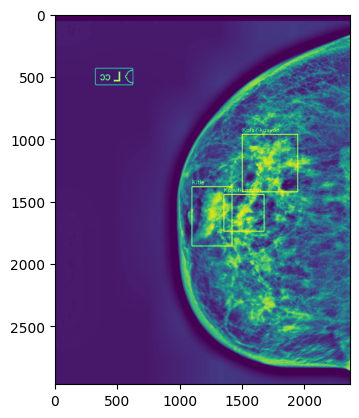

In [5]:
plt.imshow(img)
plt.show()